1. import necessary libraries
2. import dataset
3. data preprocessing
4. find optimal number of clusters -- elbow method
5. train thr model on the dataset using the cluster k value
6. visusalize the clusters

1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X= df.iloc[:,3:].values


In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

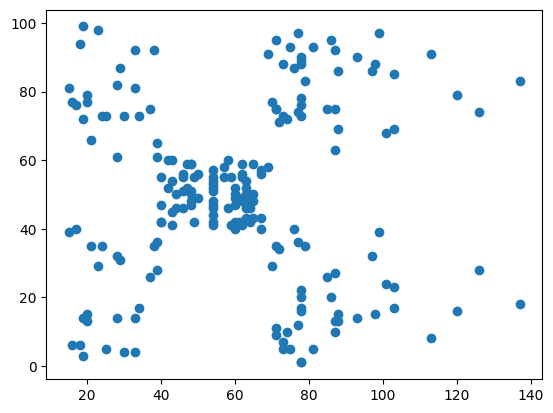

In [7]:
plt.scatter(X[:,0],X[:,1])

4. find optimal number of clusters -- elbow method

In [8]:
#WCSS= sum of the distances of observations from their cluster centroids
#k wcss

In [9]:
from sklearn.cluster import KMeans
#intialise the list to store wcss values
wcss=[]
# Try different values of K (from 1 to 10) and calculate WCSS for each K
#K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
for k in range(1,11): #k= 1 to 10
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

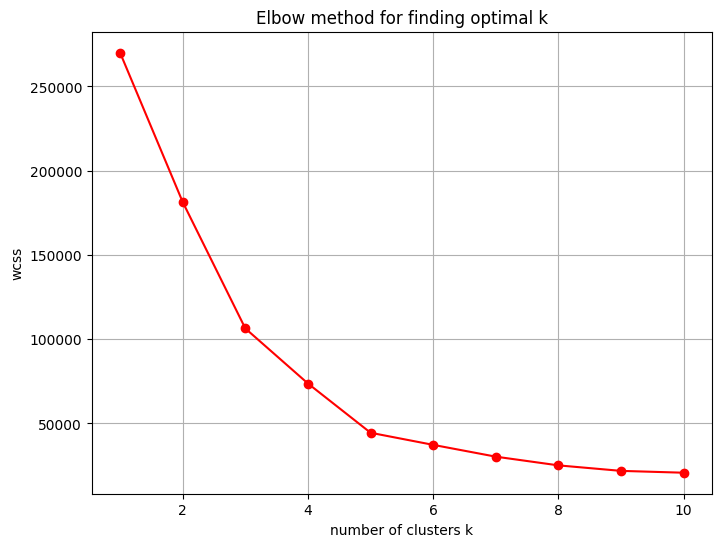

In [11]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow method for finding optimal k")
plt.xlabel("number of clusters k")
plt.ylabel("wcss")
plt.grid()
plt.show()

#5. train thr model on the dataset using the cluster k value

In [12]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)
# return a label for data based on their cluster
y_kmeans =kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

6. Visualize the clusters

In [15]:
#how many no.of datapoints belonging to 0 th cluster ffrom 0 th column anuual income
X[y_kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

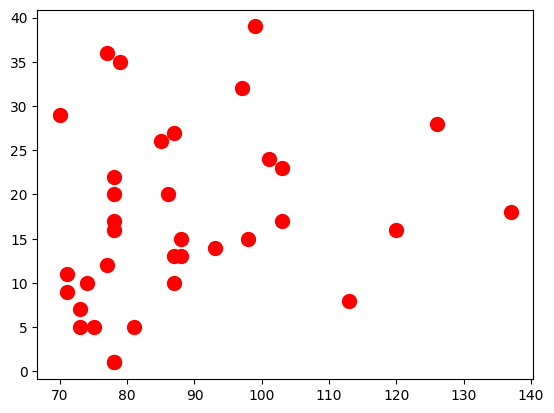

In [16]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="red",s=100,label="cluster1")

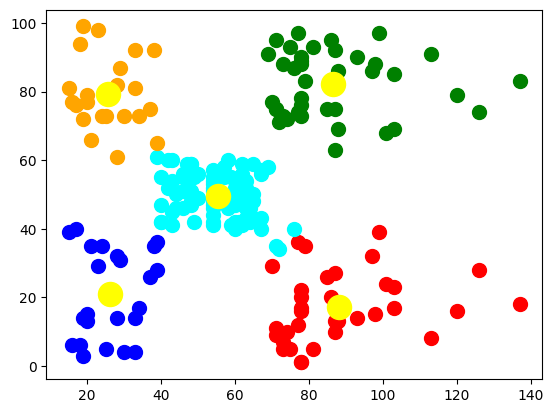

In [17]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="red",s=100,label="cluster1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],color="cyan",s=100,label="cluster2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],color="green",s=100,label="cluster3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],color="orange",s=100,label="cluster4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],color="blue",s=100,label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",s=300,label="centroid")

#label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le= LabelEncoder()

In [20]:
df["Genre"]= le.fit_transform(df["Genre"])

In [21]:
df["Genre"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64

# 7. Splitting into training and testing set

In [22]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.3,random_state=0)

In [23]:
df_train.shape,df_test.shape

((140, 5), (60, 5))

#Standard Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
df_train = sc.fit_transform(df_train)
df_test= sc.fit_transform(df_test)

In [26]:
df_train

array([[ 5.39574890e-01,  1.12163475e+00,  6.38513550e-02,
         3.66638822e-01,  9.47366216e-01],
       [-6.86415721e-02, -8.91555828e-01,  6.31418955e-01,
        -4.31026771e-02, -1.61193655e-01],
       [ 1.40845555e+00, -8.91555828e-01, -4.32770295e-01,
         1.33511873e+00,  1.38287188e+00],
       [-1.40671779e+00, -8.91555828e-01, -2.19932445e-01,
        -1.42132408e+00,  1.85796897e+00],
       [ 9.21882380e-01, -8.91555828e-01, -7.09459500e-03,
         6.27383412e-01,  9.86957640e-01],
       [-1.38152025e-01,  1.12163475e+00,  7.02364905e-01,
        -4.31026771e-02, -8.20108068e-02],
       [-7.98501326e-01, -8.91555828e-01,  8.44256805e-01,
        -6.76339539e-01, -2.40376503e-01],
       [ 1.09565851e+00, -8.91555828e-01, -5.03716245e-01,
         7.39131093e-01,  1.66001185e+00],
       [-8.50634166e-01,  1.12163475e+00, -3.61824345e-01,
        -7.13588766e-01,  3.53494857e-01],
       [-2.42417704e-01, -8.91555828e-01,  1.19898655e+00,
        -1.54850359e-01